In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fetal-health-classification/fetal_health.csv


In [2]:
data = pd.read_csv('/kaggle/input/fetal-health-classification/fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


|feature|description|
|---|---|
|baseline value| FHR baseline (beats per minute)|
|accelerations| Number of accelerations per second|
|fetal_movement| Number of fetal movements per second|
|uterine_contractions| Number of uterine contractions per second|
|light_decelerations| Number of light decelerations per second|
|severe_decelerations| Number of severe decelerations per second|
|prolongued_decelerations| Number of prolonged decelerations per second|
|abnormal_short_term_variability|Percentage of time with abnormal short term variability|

In [3]:
data['fetal_health'] = data['fetal_health'].map({1:'Normal', 2:'Suspect', 3:'Pathological'})

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

looks like no null values

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


# EDA

In [6]:
plot_data = data.groupby('fetal_health')['fetal_health'].agg(['count']).reset_index()

fig = px.pie(plot_data, values = plot_data['count'], names = plot_data['fetal_health'])

fig.update_traces(textposition = 'inside', textinfo = 'percent + label', hole = 0.5, 
                  marker = dict(colors = ['#2A3132','#336B87'], line = dict(color = 'white', width = 2)))

fig.update_layout(title_text = 'Customer<br>fetal_health', title_x = 0.5, title_y = 0.55, title_font_size = 26, 
                  title_font_family = 'Calibri', title_font_color = 'black', showlegend = False)
                  
fig.show()

In [7]:
def plot_category(feature, figsize=None):
    Normal_count = data[data['fetal_health']=='Normal'].groupby([feature]).size()
    Suspect_count = data[data['fetal_health']=='Suspect'].groupby([feature]).size()
    Pathological_count = data[data['fetal_health']=='Pathological'].groupby([feature]).size()
    labels = Normal_count.index

    x = np.arange(len(labels)) # the label locations
    width = 0.7  # the width of the bars

    if figsize:
        fig, ax = plt.subplots(figsize=figsize)
    else:
        fig, ax = plt.subplots()
    rects1 = ax.bar(x-width/3, round(Normal_count*100/data.groupby([feature]).size(), 2), 
                    width/5, label='Normal')
    rects2 = ax.bar(x-width/8, round(Suspect_count*100/data.groupby([feature]).size(), 2), 
                    width/5, label='Suspect')
    rects3 = ax.bar(x+width/8, round(Pathological_count*100/data.groupby([feature]).size(), 2), 
                    width/5, label='Pathological')
    ax.set_ylabel('Count')
    ax.set_title('Based on %s'%feature)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=80)
    ax.legend(loc=0, bbox_to_anchor=(1, 1));

    ax.bar_label(rects1, padding=1)
    ax.bar_label(rects2, padding=1)
    ax.bar_label(rects3, padding=1)
    ax.bar_label(rects4, padding=1)

    fig.tight_layout()
    plt.show()
    
def plot_numerical(feature, figsize=None):
    fig = plt.figure(figsize=(10,6))

    sns.kdeplot(data[data['fetal_health']=='Normal'][feature])
    sns.kdeplot(data[data['fetal_health']=='Suspect'][feature])
    sns.kdeplot(data[data['fetal_health']=='Pathological'][feature])

    fig.legend(labels=['Normal', 'Suspect', 'Pathological'])
    plt.title('fetal_health based on %s'%feature)
    plt.show()
    
def plot_pie(feature):
    plot_data = data.groupby([feature, 'fetal_health'])[feature].agg({'count'}).reset_index()

    fig = px.sunburst(plot_data, path = [feature, 'fetal_health'], values = 'count', color = feature, 
                      title = 'Affect of %s on Customer fetal_health'%feature, width = 600, height = 600)

    fig.update_layout(plot_bgcolor = 'white', title_font_family = 'Calibri Black', title_font_color = '#221f1f', 
                      title_font_size = 22, title_x = 0.5)

    fig.update_traces(textinfo = 'label + percent parent')
    fig.show()

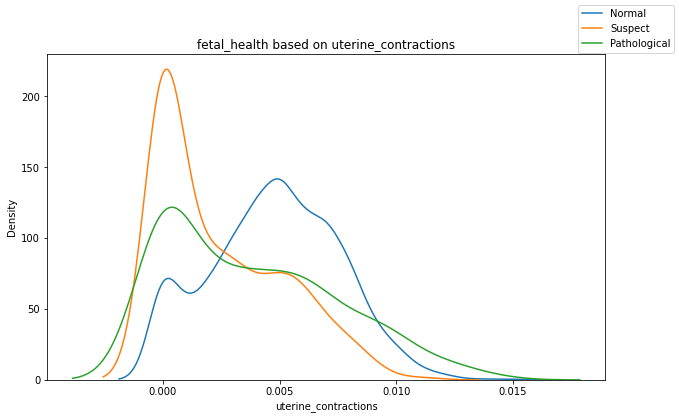

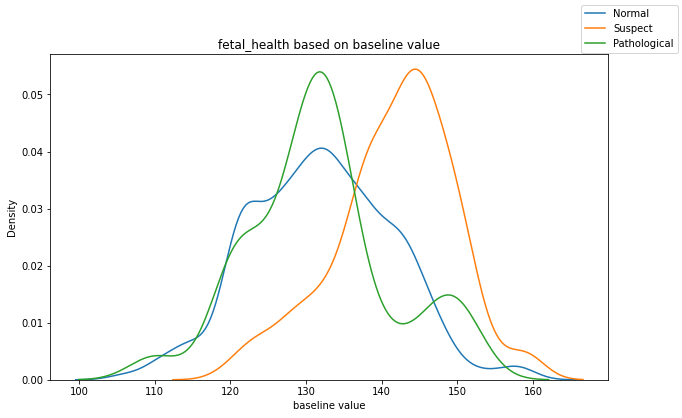

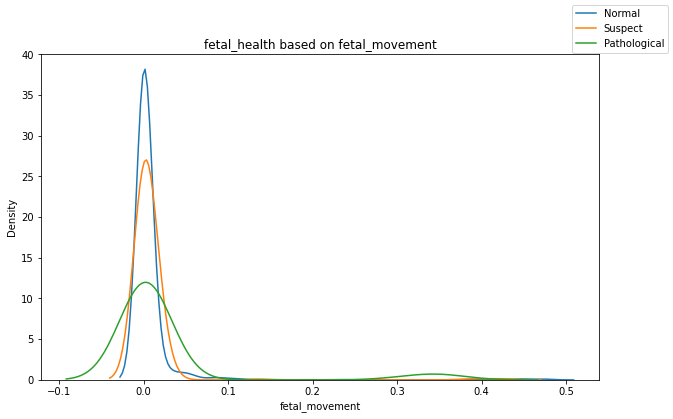

In [8]:
for feature in ['uterine_contractions', 'baseline value', 'fetal_movement']:
    plot_numerical(feature)

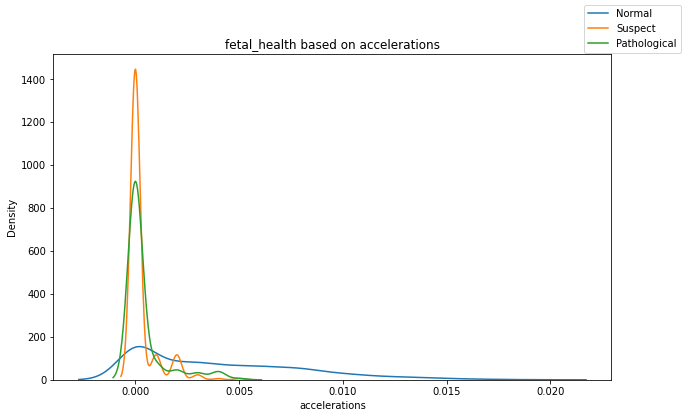

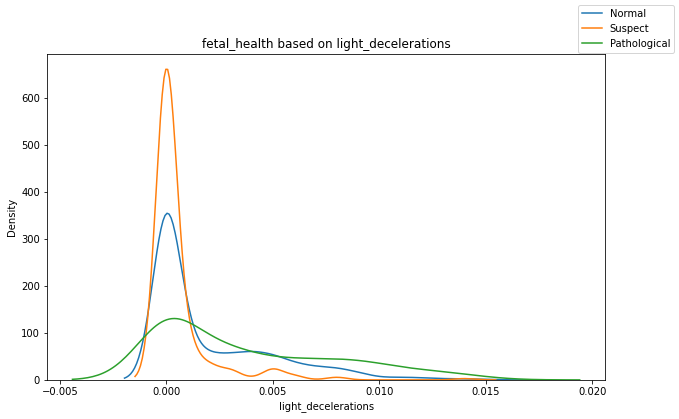

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



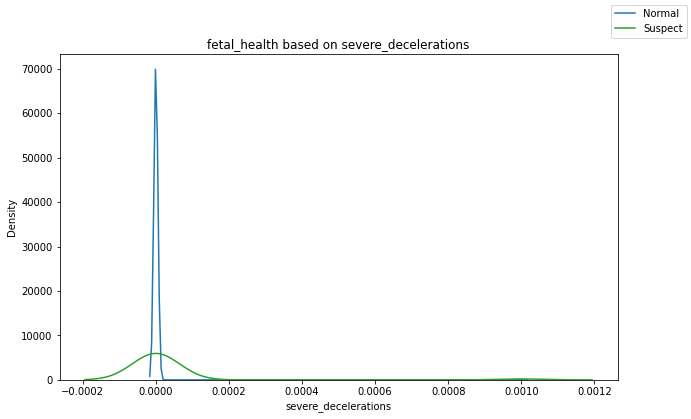

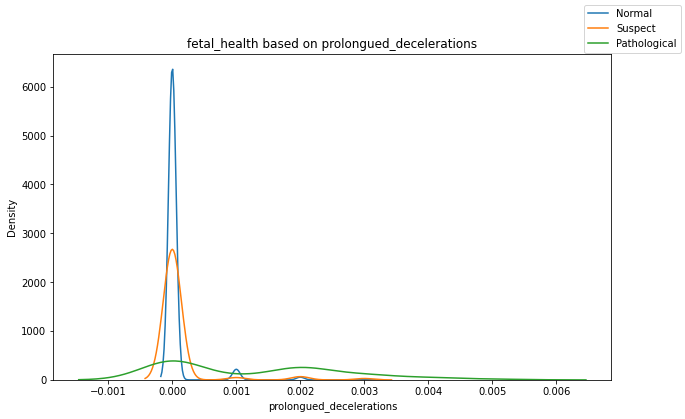

In [9]:
for feature in ['accelerations', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations']:
    plot_numerical(feature)

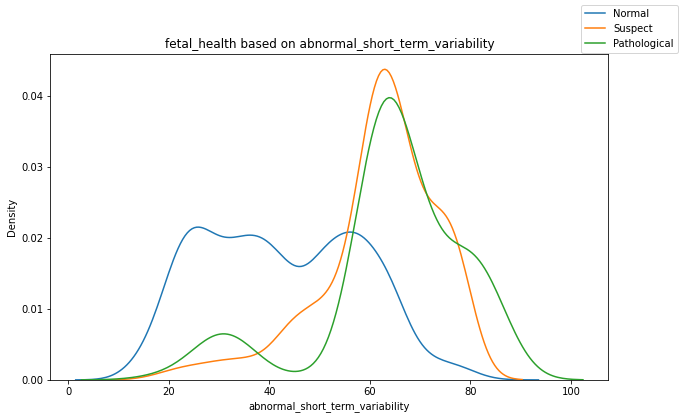

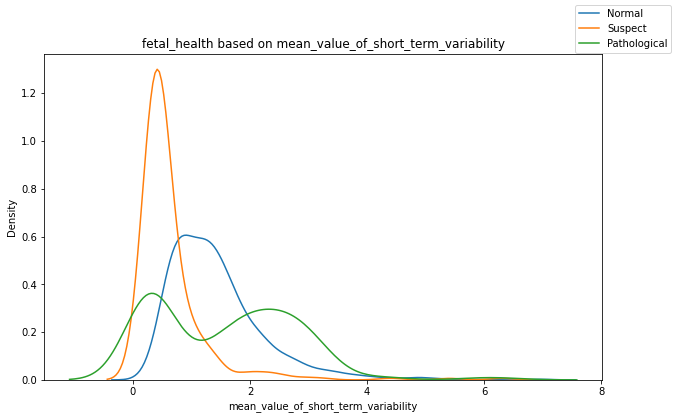

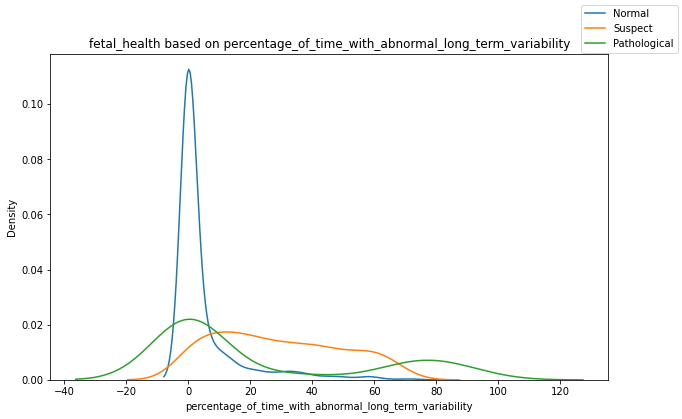

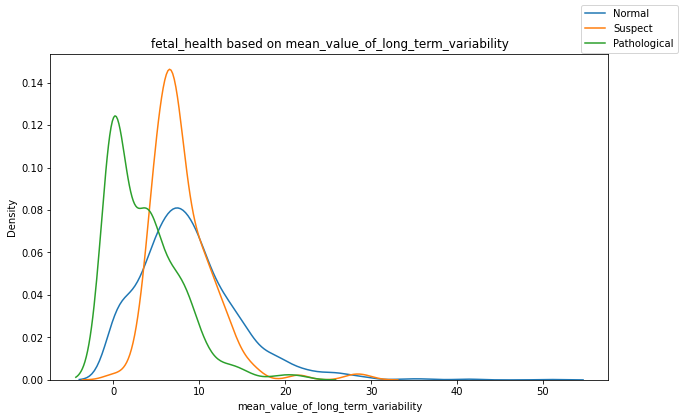

In [10]:
for feature in ['abnormal_short_term_variability', 'mean_value_of_short_term_variability', 
                'percentage_of_time_with_abnormal_long_term_variability',
                'mean_value_of_long_term_variability']:
    plot_numerical(feature)

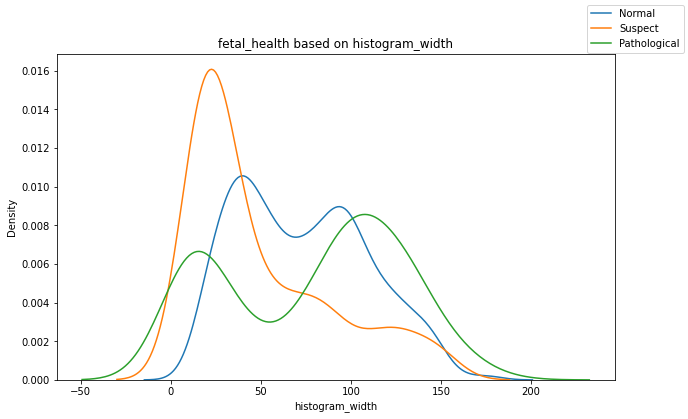

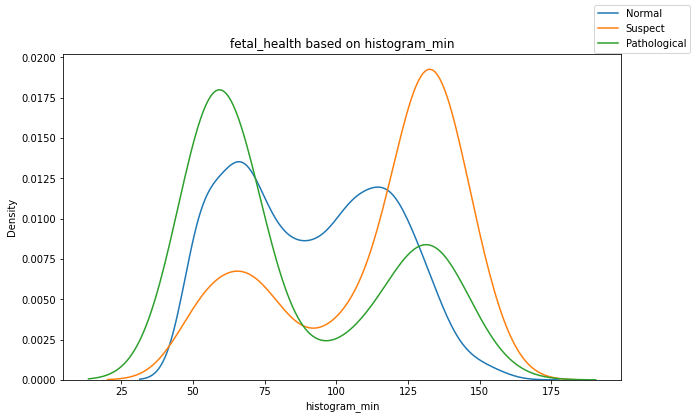

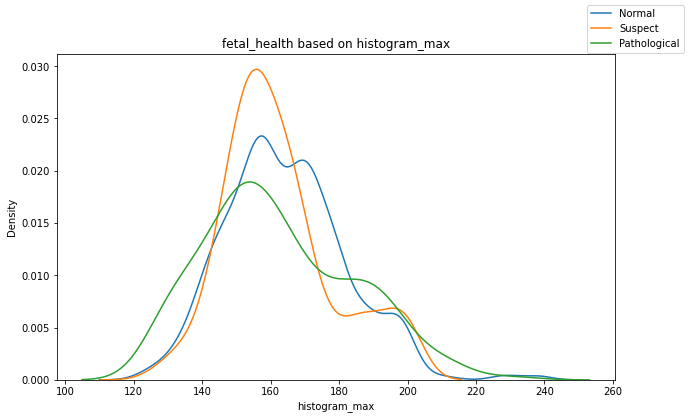

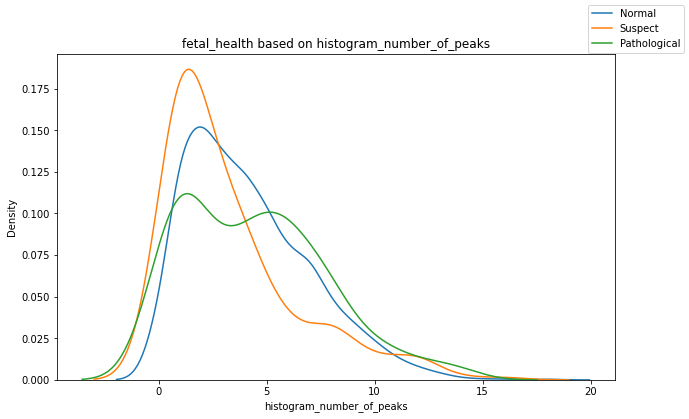

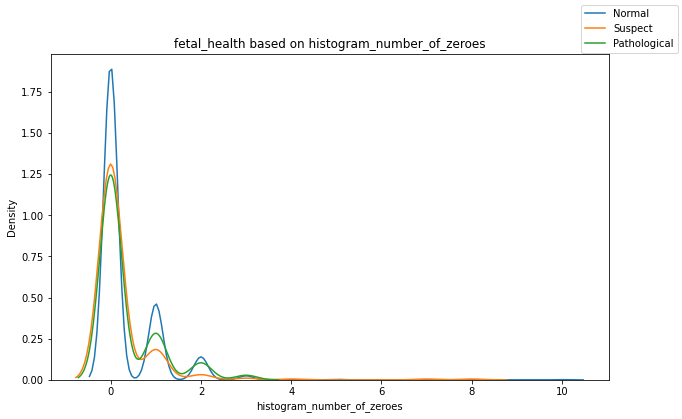

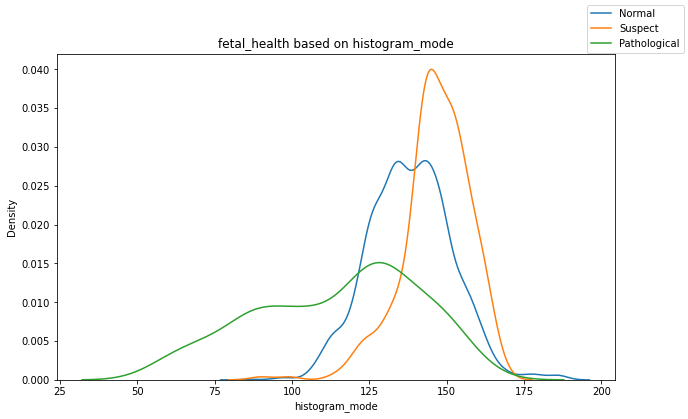

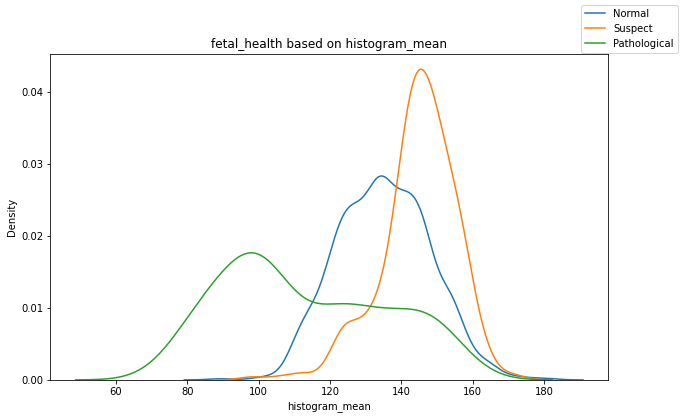

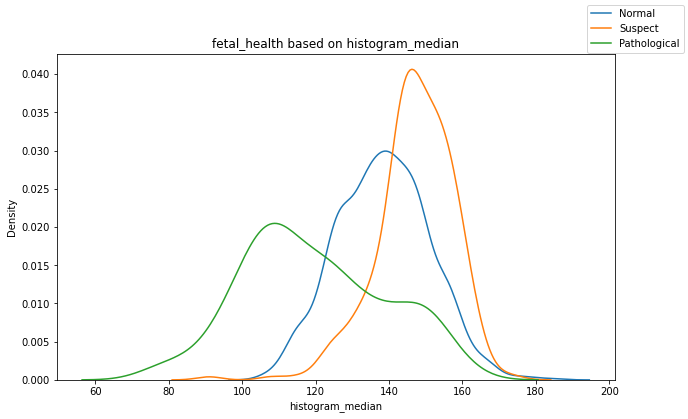

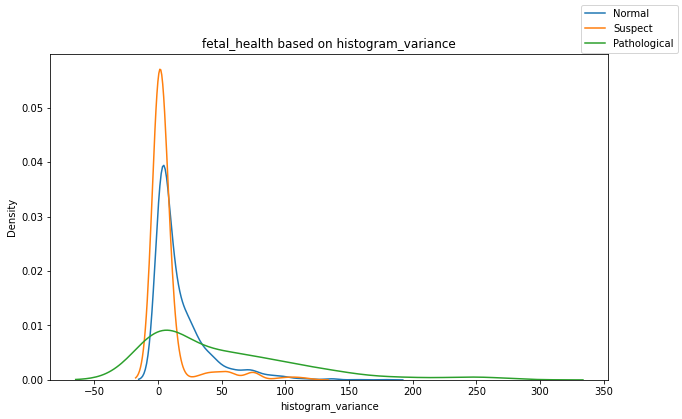

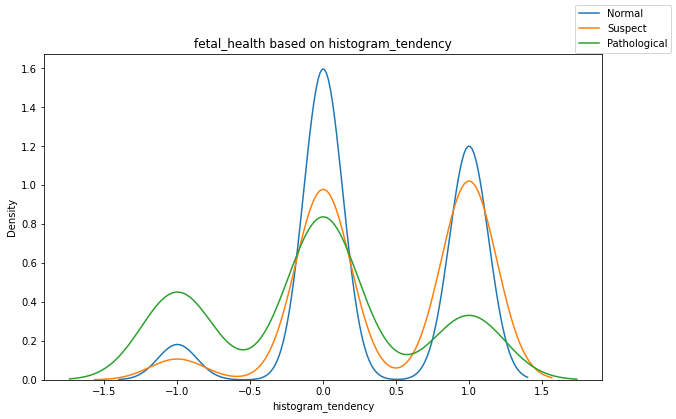

In [11]:
for feature in ['histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']:
    plot_numerical(feature)

**Observations-**
* uterine_contractions - >0.0025 is normal while < 0.0025 is suspect
* baseline value - 125-135 is Pathological, 135+ is Suspect
* accelerations - 0.0025+ is normal
* abnormal_short_term_variability - <50 is normal
* mean_value_of_short_term_variability - <1 is suspect, 1-2 is normal & >2 is pathological
* percentage_of_time_with_abnormal_long_term_variability - 10-70 is suspect
* mean_value_of_long_term_variability - <3 is Pathological, 3-10 is suspect and 10+ is normal

In [12]:
numerical_features = ['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

# CORRELATION

In [13]:
df = data.copy()
df['fetal_health'] = df['fetal_health'].map({'Normal':0, 'Suspect':1, 'Pathological':2})

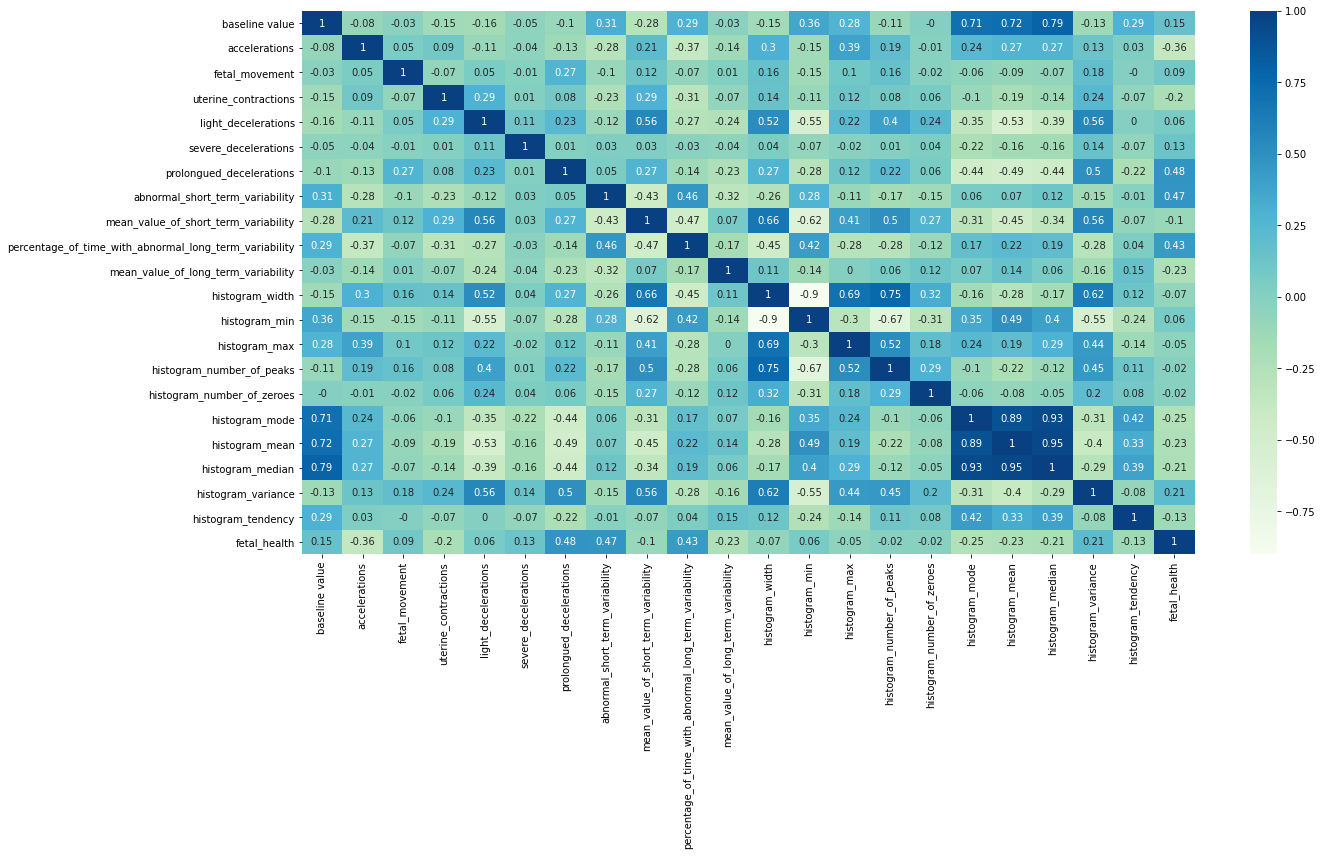

In [14]:
plt.figure(figsize=(20, 10))
sns.heatmap(round(df[numerical_features+['fetal_health']].corr(), 2), annot=True,
            mask=None, cmap='GnBu')
corr_mat = df.corr()
plt.show()

**Observations-**
* baseline value - histogram_mode, histogram_mean, histogram_median
* mean_value_of_short_term_variability - light_decelerations, histogram_variance, histogram_width

In [15]:
# Correlated Features
s = corr_mat.unstack()
so = s.sort_values(kind="quicksort").drop_duplicates()
res1 = so[so>=0.5]
print(res1)

mean_value_of_short_term_variability  histogram_number_of_peaks               0.501430
histogram_variance                    prolongued_decelerations                0.503301
histogram_max                         histogram_number_of_peaks               0.517652
light_decelerations                   histogram_width                         0.520467
mean_value_of_short_term_variability  histogram_variance                      0.555852
light_decelerations                   mean_value_of_short_term_variability    0.562170
histogram_variance                    light_decelerations                     0.564289
                                      histogram_width                         0.615884
histogram_width                       mean_value_of_short_term_variability    0.660847
                                      histogram_max                           0.690769
histogram_mode                        baseline value                          0.708993
baseline value                        histo

# Analyzing features using VIF

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [17]:
# Calculating VIF
vif = pd.DataFrame()
vif["variables"] = [feature for feature in numerical_features if feature not in ['histogram_median', 'histogram_min', 'histogram_max',
                                                                                'histogram_mean', 'histogram_mode']]
vif["VIF"] = [variance_inflation_factor(df[vif['variables']].values, i) for i in range(len(vif["variables"]))]
print(vif)

                                            variables        VIF
0                                      baseline value  35.136079
1                                       accelerations   3.465920
2                                      fetal_movement   1.181539
3                                uterine_contractions   3.893366
4                                 light_decelerations   3.897864
5                                severe_decelerations   1.049096
6                            prolongued_decelerations   1.951967
7                     abnormal_short_term_variability  14.414211
8                mean_value_of_short_term_variability   8.314584
9   percentage_of_time_with_abnormal_long_term_var...   2.392182
10                mean_value_of_long_term_variability   5.922477
11                                    histogram_width  18.646126
12                          histogram_number_of_peaks   6.769155
13                         histogram_number_of_zeroes   1.416665
14                       

# Looking at Outliers

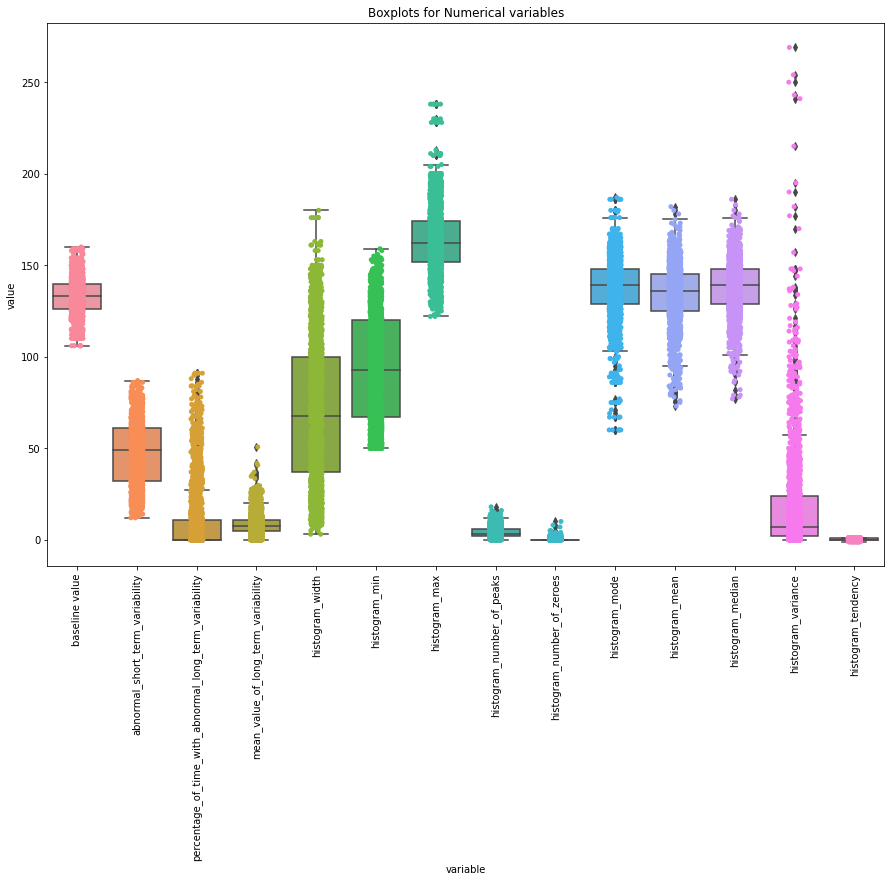

In [18]:
NumericData = data[[feature for feature in numerical_features if feature not in ['accelerations', 'fetal_movement',
                                                                                'uterine_contractions', 'light_decelerations',
                                                                                'severe_decelerations', 'prolongued_decelerations',
                                                                                'mean_value_of_short_term_variability']]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

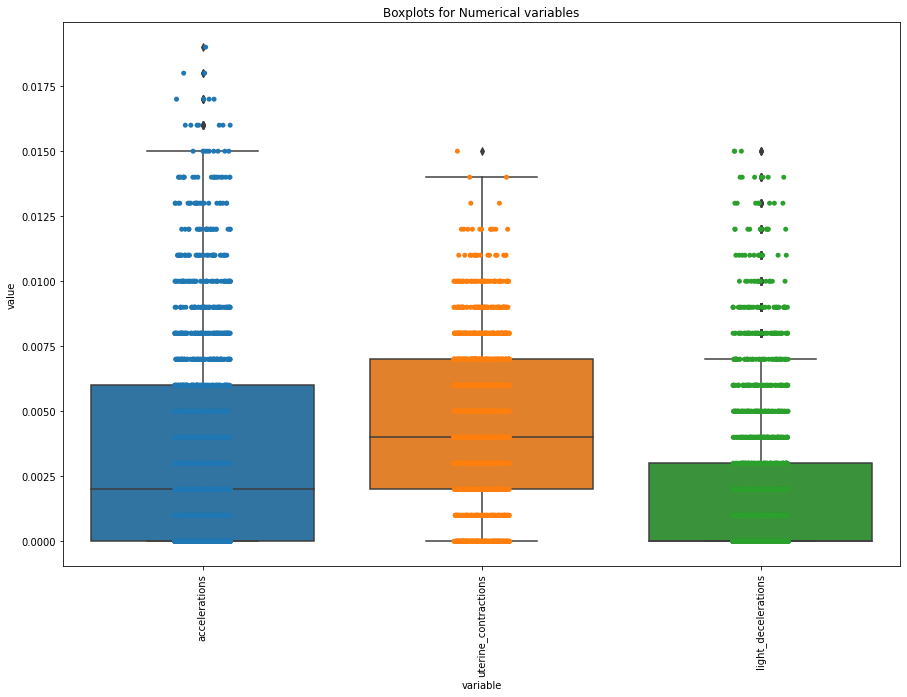

In [19]:
NumericData = data[[feature for feature in ['accelerations', 'uterine_contractions', 'light_decelerations']]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

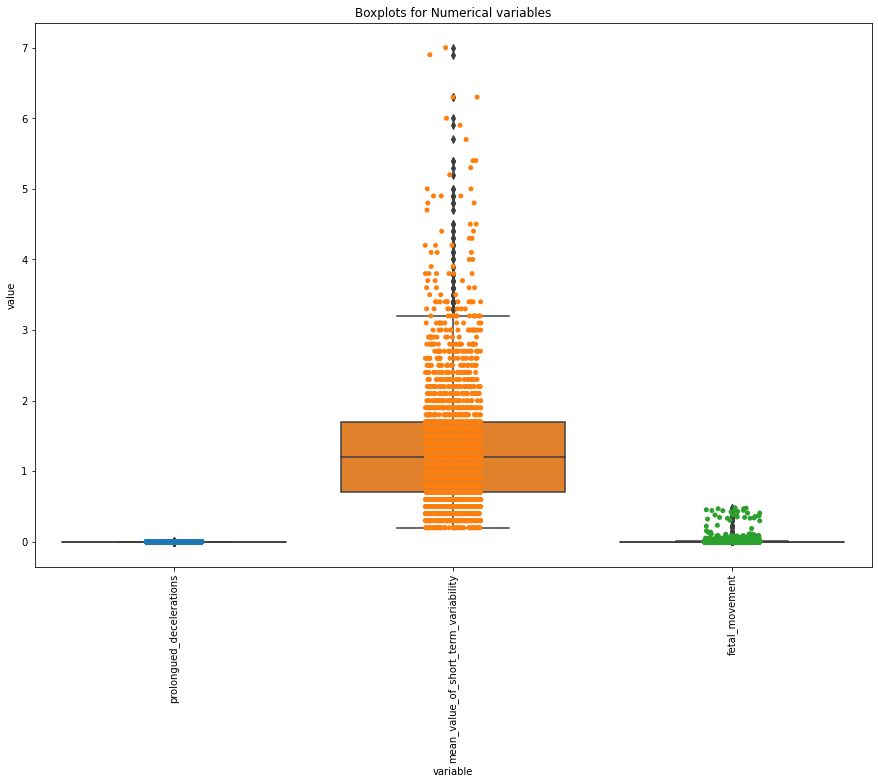

In [20]:
NumericData = data[[feature for feature in ['prolongued_decelerations', 'mean_value_of_short_term_variability', 'fetal_movement']]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

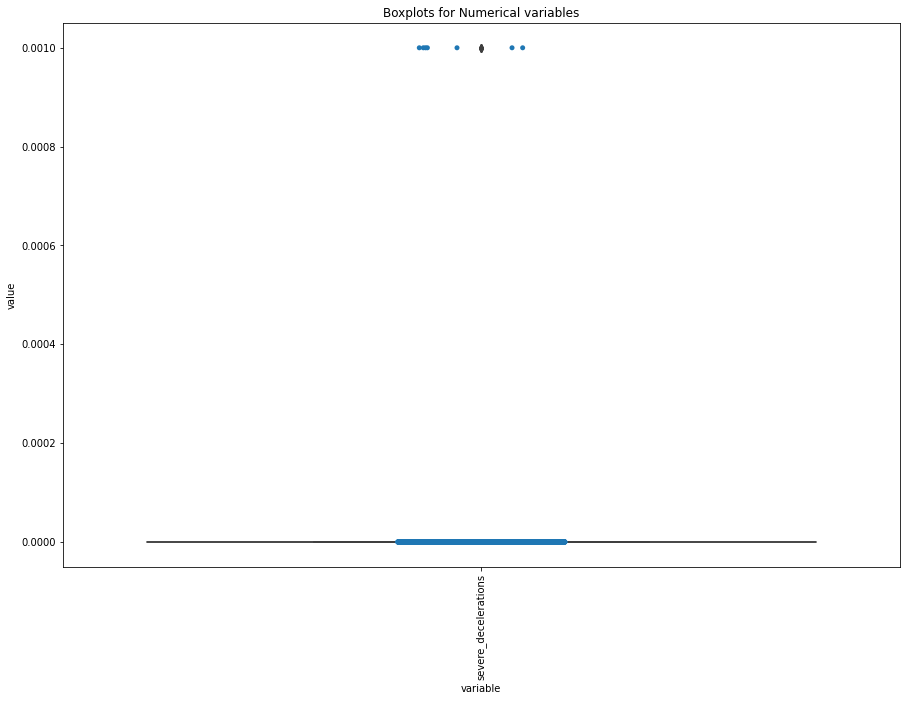

In [21]:
NumericData = data[[feature for feature in ['severe_decelerations']]]
NumericMelt = NumericData.melt()
plt.figure(figsize=(15,10))
plt.title("Boxplots for Numerical variables")
bp = sns.boxplot(x='variable', y='value', data=NumericMelt)
bp = sns.stripplot(x='variable', y='value', data=NumericMelt, jitter=True, edgecolor='gray')
bp.set_xticklabels(bp.get_xticklabels(), rotation=90)
plt.show()

In [22]:
# Percentage of outliers present in each variable
outlier_percentage = {}
for feature in numerical_features:
    tempData = data.sort_values(by=feature)[feature]
    Q1, Q3 = tempData.quantile([0.25, 0.75])
    IQR = Q3 - Q1
    Lower_range = Q1 - (1.5 * IQR)
    Upper_range = Q3 + (1.5 * IQR)
    outlier_percentage[feature] = round((((tempData<(Q1 - 1.5 * IQR)) | (tempData>(Q3 + 1.5 * IQR))).sum()/tempData.shape[0])*100,2)
outlier_percentage

{'baseline value': 0.0,
 'accelerations': 0.66,
 'fetal_movement': 14.44,
 'uterine_contractions': 0.05,
 'light_decelerations': 7.06,
 'severe_decelerations': 0.33,
 'prolongued_decelerations': 8.37,
 'abnormal_short_term_variability': 0.0,
 'mean_value_of_short_term_variability': 3.29,
 'percentage_of_time_with_abnormal_long_term_variability': 14.53,
 'mean_value_of_long_term_variability': 3.34,
 'histogram_width': 0.0,
 'histogram_min': 0.0,
 'histogram_max': 1.13,
 'histogram_number_of_peaks': 0.89,
 'histogram_number_of_zeroes': 23.61,
 'histogram_mode': 3.43,
 'histogram_mean': 2.12,
 'histogram_median': 1.32,
 'histogram_variance': 8.65,
 'histogram_tendency': 0.0}

# Training Model

In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from xgboost import XGBClassifier

In [24]:
train_data = df.copy()
feature_cols = [feature for feature in train_data.columns if feature not in(['fetal_health'])]
print('features used- ', feature_cols)

''' Rescaling to [0,1] '''
scaler = StandardScaler()
scaler.fit(train_data[feature_cols])
train_data[feature_cols] = scaler.transform(train_data[feature_cols])

features used-  ['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']


In [25]:
X = train_data[feature_cols]
y = train_data['fetal_health']

validation_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, 
                                                    random_state=0, stratify=y)

# Model 1: Logistic Regression

In [26]:
model = LogisticRegression(class_weight={0:1, 1:5, 2:5}, max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 5, 2: 5}, max_iter=200)

In [27]:
y_pred = model.predict(X_train)

print('Train metrics...')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = model.predict(X_test)

print('Validation metrics...')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train metrics...
[[1029  117   12]
 [   8  182   17]
 [   2   15  106]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1158
           1       0.58      0.88      0.70       207
           2       0.79      0.86      0.82       123

    accuracy                           0.89      1488
   macro avg       0.79      0.88      0.82      1488
weighted avg       0.92      0.89      0.89      1488

Validation metrics...
[[441  53   3]
 [  6  72  10]
 [  2  10  41]]
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       497
           1       0.53      0.82      0.65        88
           2       0.76      0.77      0.77        53

    accuracy                           0.87       638
   macro avg       0.76      0.83      0.78       638
weighted avg       0.90      0.87      0.88       638



In [28]:
''' metrics on original data '''
y_pred = model.predict(train_data[feature_cols])

def make_cm(matrix, columns):
    n = len(columns)
    act = ['actual fetal_health'] * n
    pred = ['predicted fetal_health'] * n

    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

df_matrix=make_cm(
    confusion_matrix(train_data['fetal_health'], y_pred),['Normal', 'Suspect', 'Pathological'])

display(df_matrix)
print(classification_report(train_data['fetal_health'], y_pred))

predicted fetal_health                     
                                                 Normal Suspect Pathological
actual fetal_health Normal                         1470     170           15
                    Suspect                          14     254           27
                    Pathological                      4      25          147

              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1655
           1       0.57      0.86      0.68       295
           2       0.78      0.84      0.81       176

    accuracy                           0.88      2126
   macro avg       0.78      0.86      0.81      2126
weighted avg       0.91      0.88      0.89      2126



# Model 2: XGB

In [29]:
model = XGBClassifier(
    learning_rate=0.02, 
    max_depth=5,
    #min_child_weight=2, 
    n_estimators=300, 
    random_state=0, 
    #reg_lambda=2,
    #reg_alpha=0.5,
    use_label_encoder=False
)

model.fit(X_train, y_train,
          eval_metric='merror',
          verbose=False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [30]:
y_pred = model.predict(X_train)

print('Train metrics...')
print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

y_pred = model.predict(X_test)

print('Test metrics...')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train metrics...
[[1157    1    0]
 [   5  202    0]
 [   0    1  122]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1158
           1       0.99      0.98      0.98       207
           2       1.00      0.99      1.00       123

    accuracy                           1.00      1488
   macro avg       1.00      0.99      0.99      1488
weighted avg       1.00      1.00      1.00      1488

Test metrics...
[[490   5   2]
 [ 19  68   1]
 [  4   2  47]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       497
           1       0.91      0.77      0.83        88
           2       0.94      0.89      0.91        53

    accuracy                           0.95       638
   macro avg       0.93      0.88      0.91       638
weighted avg       0.95      0.95      0.95       638



/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



In [31]:
''' metrics on original data '''
y_pred = model.predict(train_data[feature_cols])

def make_cm(matrix, columns):
    n = len(columns)
    act = ['actual fetal_health'] * n
    pred = ['predicted fetal_health'] * n

    cm = pd.DataFrame(matrix, 
        columns=[pred, columns], index=[act, columns])
    return cm

df_matrix=make_cm(
    confusion_matrix(train_data['fetal_health'], y_pred),['Normal', 'Suspect', 'Pathological'])

display(df_matrix)
print(classification_report(train_data['fetal_health'], y_pred))

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning:

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption



predicted fetal_health                     
                                                 Normal Suspect Pathological
actual fetal_health Normal                         1647       6            2
                    Suspect                          24     270            1
                    Pathological                      4       3          169

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1655
           1       0.97      0.92      0.94       295
           2       0.98      0.96      0.97       176

    accuracy                           0.98      2126
   macro avg       0.98      0.96      0.97      2126
weighted avg       0.98      0.98      0.98      2126

